In [32]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from numba import jit
import cProfile

In [33]:
# Definition of Julia's sequence function

def Julia(z, c):
    return(z**2 + c)

In [34]:
def Mandelbrot(Range = 300):
    #c = complex(-0.1, 0.651) # examples straight from wikipedia
    c = complex(1-(np.sqrt(5))/2, 0)
    r = (1+np.sqrt(5))/2
    z_max = 2 
    x_lim = 600; y_lim = 600
    Re_min = -2; Re_max = 1 # Limits as in wikipedia and presentation
    Im_min = -1.5; Im_max = 1.5
    fract = np.zeros((x_lim, y_lim))
    re = np.linspace(Re_min, Re_max, x_lim)
    im = np.linspace(Im_min, Im_max, y_lim)
    #z_0 = complex(-0.25, 0)
    for i in range(x_lim):
        for j in range(y_lim):
            z = 0# starting point for Mandelbrot
            c = complex(re[j],im[i]) # c is given by coordinates (x,y): c = x + iy
            for n in range(Range):
                if abs(z) > z_max: break; # since z is growing really fast, we will manually "cut" abs(z)
                z = Julia(z,c) 
            fract[i,j] = n/Range # our dots will have different color depending on number of "convergence" iterations 
    return fract

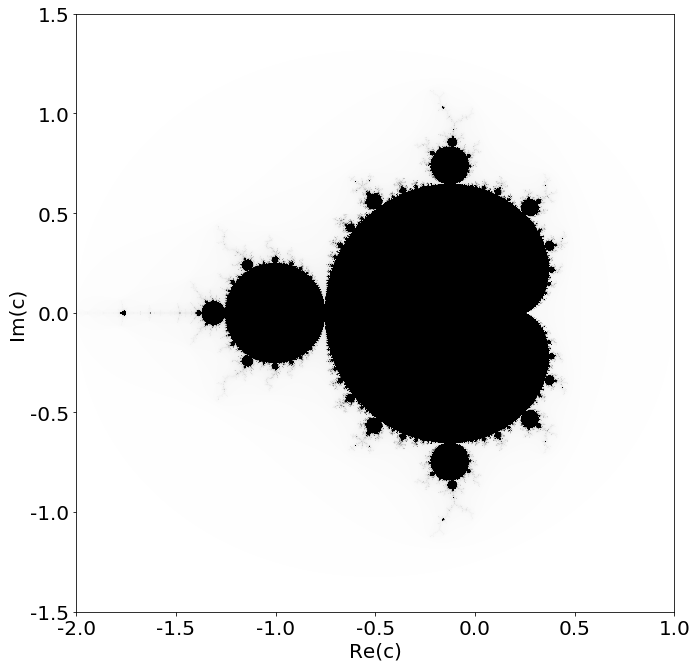

In [35]:
fract = Mandelbrot()

plt.figure(figsize = (14,11))
plt.rcParams.update({'font.size': 20})
plt.imshow(fract, cmap='binary') # imshow for 2D-grafics 
plt.xlabel('Re(c)')
plt.ylabel('Im(c)')

plt.xlim(0 ,x_lim)
plt.ylim(0 ,y_lim)
plt.xticks(np.arange(0,x_lim+100,100),np.linspace(Re_min,Re_max,7))
plt.yticks(np.arange(0,y_lim+100,100),np.linspace(Im_min,Im_max,7))
plt.show() 

In [36]:
cProfile.run('Mandelbrot()')

         39713479 function calls (39713473 primitive calls) in 7.637 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(any)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(linspace)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(ndim)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(result_type)
 19706966    2.113    0.000    2.113    0.000 <ipython-input-33-868b2d161072>:3(Julia)
        1    4.381    4.381    7.637    7.637 <ipython-input-34-44e0e6cd311b>:1(Mandelbrot)
        1    0.000    0.000    7.637    7.637 <string>:1(<module>)
        4    0.000    0.000    0.000    0.000 _asarray.py:88(asanyarray)
        2    0.000    0.000    0.000    0.000 _methods.py:44(_any)
        2    0.000    0.000    0.000    0.000 fromnumeric.py:2185(_any_dispatcher)
 

In [40]:
@jit
def Julia_jit(z, c):
    return(z**2 + c)

In [41]:
@jit
def Mandelbrot_jit(Range = 300):
    #c = complex(-0.1, 0.651) # examples straight from wikipedia
    c = complex(1-(np.sqrt(5))/2, 0)
    r = (1+np.sqrt(5))/2
    z_max = 2 
    x_lim = 600; y_lim = 600
    Re_min = -2; Re_max = 1 # Limits as in wikipedia and presentation
    Im_min = -1.5; Im_max = 1.5
    fract = np.zeros((x_lim, y_lim))
    re = np.linspace(Re_min, Re_max, x_lim)
    im = np.linspace(Im_min, Im_max, y_lim)
    #z_0 = complex(-0.25, 0)
    for i in range(x_lim):
        for j in range(y_lim):
            z = 0# starting point for Mandelbrot
            c = complex(re[j],im[i]) # c is given by coordinates (x,y): c = x + iy
            for n in range(Range):
                if abs(z) > z_max: break; # since z is growing really fast, we will manually "cut" abs(z)
                z = Julia_jit(z,c) 
            fract[i,j] = n/Range # our dots will have different color depending on number of "convergence" iterations 
    return fract

In [44]:
import time
time_jit = []
time_numpy = []
start_time = 0
Range = range(400, 1000, 100)
for R in Range:
    start_time = time.time()
    f1 = Mandelbrot(R)
    time_numpy.append(time.time() - start_time)

    start_time = time.time()
    f2 = Mandelbrot_jit(R)
    time_jit.append(time.time() - start_time)

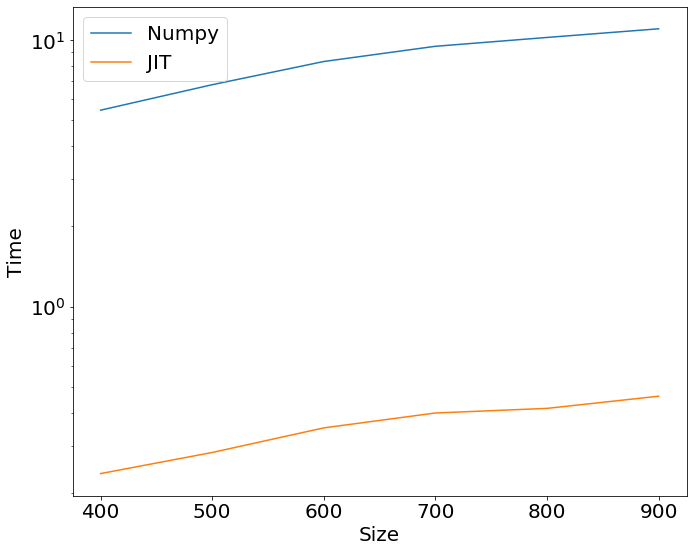

In [45]:
plt.figure(figsize=(11, 9))
plt.rcParams.update({'font.size': 20})
plt.plot(Range, time_numpy, label='Numpy')
plt.plot(Range, time_jit, label='JIT')
plt.legend(loc='best')
plt.xlabel('Size')
plt.ylabel('Time')
plt.yscale('log')
plt.show()